In [280]:
import pandas as pd

## Starbucks Table

In [281]:
import requests
response = requests.get("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
#response

In [282]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")
#soup

In [283]:
table = soup.find_all('table',{'class','wpr-table'})[0]
#table

In [284]:
state = []
star2023 = []
star2021 = []
star2024 = []
for stores in table.find_all('tr')[1:]:
    state.append(stores.find("th").get_text(strip = False))
    star2023.append(stores.find_all("td")[0].get_text(strip = False))
    star2021.append(stores.find_all("td")[1].get_text(strip = False))
    star2024.append(stores.find_all("td")[2].get_text(strip = False))


newstructure = pd.DataFrame({
    'State': state,
    'Starbucks 2021': star2021,
    'Starbucks 2023': star2023,
    'Starbucks 2024': star2024
    })
newstructure.head()

,State,Starbucks 2021,Starbucks 2023,Starbucks 2024
0,California,"2,959","3,080","3,117"
1,Texas,"1,215","1,346","1,409"
2,Florida,786,844,892
3,Washington,739,741,736
4,New York,643,692,715


## Dunkin Table

In [285]:
response1 = requests.get("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
#response1

In [286]:
soup1 = BeautifulSoup(response1.content, "html.parser")
#soup1

In [287]:
table1 = soup1.find_all('table',{'class','wpr-table'})[0]
table1

<table class="wpr-table"><thead class="table-head bg-wpr-table_header_bg relative z-40 px-0 py-0 text-xs uppercase tracking-wider"><tr><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 pin left-0 z-50 border-l-0"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">State</div></div></th><th class="datatable-th bg-wpr-table_header_bg text-wpr-table_header border-wpr-table_border sticky top-0 border-b bg-clip-padding px-3 py-2 text-left align-bottom leading-4 md:px-4 z-40"><div class="flex flex-col items-stretch justify-start"><div class="flex flex-row items-center cursor-pointer select-none">Dunkin Locations 2024<svg class="icon icon-tabler icon-tabler-chevron-down" fill="none" height="14" stroke="currentColor" stroke-linecap="round" stroke-linejoin="round" stroke-width="2" viewbox="0 0 24

In [288]:
state = []
dunk2024 = []
dunk2023 = []
for stores in table1.find_all('tr')[1:]:
    state.append(stores.find("th").get_text(strip = False))
    dunk2024.append(stores.find_all("td")[0].get_text(strip = False))
    dunk2023.append(stores.find_all("td")[1].get_text(strip = False))


newstructure1 = pd.DataFrame({
    'State': state,
    'Dunkin 2024': dunk2024,
    'Dunkin 2023': dunk2023
    })
newstructure1.head()

,State,Dunkin 2024,Dunkin 2023
0,New York,"1,431","1,414"
1,Massachusetts,"1,042","1,068"
2,Florida,909,883
3,New Jersey,872,866
4,Illinois,711,692


In [289]:
# Combining the two tables
coffee = newstructure.merge(newstructure1)

In [290]:
resp = requests.get("https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population")

In [291]:
sop = BeautifulSoup(resp.content, "html.parser")
#sop

In [292]:
tables = sop.find_all('table',{'class','wikitable'})[0]
#tables

In [293]:
state = []
population = []
for per in tables.find_all('tr')[1:]:
    state.append(per.find_all("td")[2].get_text(strip = True))
    population.append(per.find_all("td")[3].get_text(strip = True))



census = pd.DataFrame({
    'State': state,
    'Population': population})
coffee2 = coffee.merge(census, on = "State", how="inner")
coffee2.head()

,State,Starbucks 2021,Starbucks 2023,Starbucks 2024,Dunkin 2024,Dunkin 2023,Population
0,California,"2,959","3,080","3,117",143,134,"39,538,223"
1,Texas,"1,215","1,346","1,409",226,196,"30,145,505"
2,Florida,786,844,892,909,883,"21,538,187"
3,Washington,739,741,736,0,19,"7,705,281"
4,New York,643,692,715,"1,431","1,414","20,201,249"


In [294]:
# Adding Stock Prices
coffee2['Dunkin Stock Price'] = 106.48
coffee2['Starbucks Stock Price'] = 96.40

In [295]:
state_to_region = {
    # Northeast
    'Connecticut': 'Northeast',
    'Maine': 'Northeast',
    'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast',
    'Rhode Island': 'Northeast',
    'Vermont': 'Northeast',
    'New Jersey': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    
    # Midwest
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Michigan': 'Midwest',
    'Ohio': 'Midwest',
    'Wisconsin': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Missouri': 'Midwest',
    'Nebraska': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    
    # South
    'Delaware': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Maryland': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Virginia': 'South',
    'District of Columbia': 'Northeast',
    'West Virginia': 'South',
    'Alabama': 'South',
    'Kentucky': 'South',
    'Mississippi': 'South',
    'Tennessee': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    
    # West
    'Arizona': 'West',
    'Colorado': 'West',
    'Idaho': 'West',
    'Montana': 'West',
    'Nevada': 'West',
    'New Mexico': 'West',
    'Utah': 'West',
    'Wyoming': 'West',
    'Alaska': 'West',
    'California': 'West',
    'Hawaii': 'West',
    'Oregon': 'West',
    'Washington': 'West'
}
coffee2['Region'] = coffee2['State'].map(state_to_region)
coffee2.head()

,State,Starbucks 2021,Starbucks 2023,Starbucks 2024,Dunkin 2024,Dunkin 2023,Population,Dunkin Stock Price,Starbucks Stock Price,Region
0,California,"2,959","3,080","3,117",143,134,"39,538,223",106.48,96.4,West
1,Texas,"1,215","1,346","1,409",226,196,"30,145,505",106.48,96.4,South
2,Florida,786,844,892,909,883,"21,538,187",106.48,96.4,South
3,Washington,739,741,736,0,19,"7,705,281",106.48,96.4,West
4,New York,643,692,715,"1,431","1,414","20,201,249",106.48,96.4,Northeast


The above regions were automated using Chat GPT-4o.

## 7 Analyze

In [296]:
# Dataframe into long format
coffee2_long = pd.melt(coffee2, id_vars=['Region','State','Population','Dunkin Stock Price','Starbucks Stock Price'], var_name='Coffee Shop', value_name='Stores')

coffee2_long['Year'] = coffee2_long['Coffee Shop'].str.extract(r'(\d{4})').astype(int)

coffee2_long['Coffee Shop'] = coffee2_long['Coffee Shop'].str.replace(r' \d{4}', '', regex=True)
coffee2_long['Stores'] = pd.to_numeric(coffee2_long['Stores'].str.replace(',',''),errors='coerce')

coffee2_long.head()

,Region,State,Population,Dunkin Stock Price,Starbucks Stock Price,Coffee Shop,Stores,Year
0,West,California,"39,538,223",106.48,96.4,Starbucks,2959.0,2021
1,South,Texas,"30,145,505",106.48,96.4,Starbucks,1215.0,2021
2,South,Florida,"21,538,187",106.48,96.4,Starbucks,786.0,2021
3,West,Washington,"7,705,281",106.48,96.4,Starbucks,739.0,2021
4,Northeast,New York,"20,201,249",106.48,96.4,Starbucks,643.0,2021


Chat GPT-4o helped with the regular expression string replacement above.

In [297]:
coffee2new = coffee2_long[coffee2_long['Year']==2023]
coffee2new = coffee2new.groupby(['Region','Coffee Shop']).agg({'Stores': 'mean'}).reset_index()
coffee2new

,Region,Coffee Shop,Stores
0,Midwest,Dunkin,116.500000
1,Midwest,Starbucks,205.666667
2,Northeast,Dunkin,560.333333
3,Northeast,Starbucks,189.100000
4,South,Dunkin,159.812500
5,South,Starbucks,278.875000
6,West,Dunkin,27.923077
7,West,Starbucks,455.615385


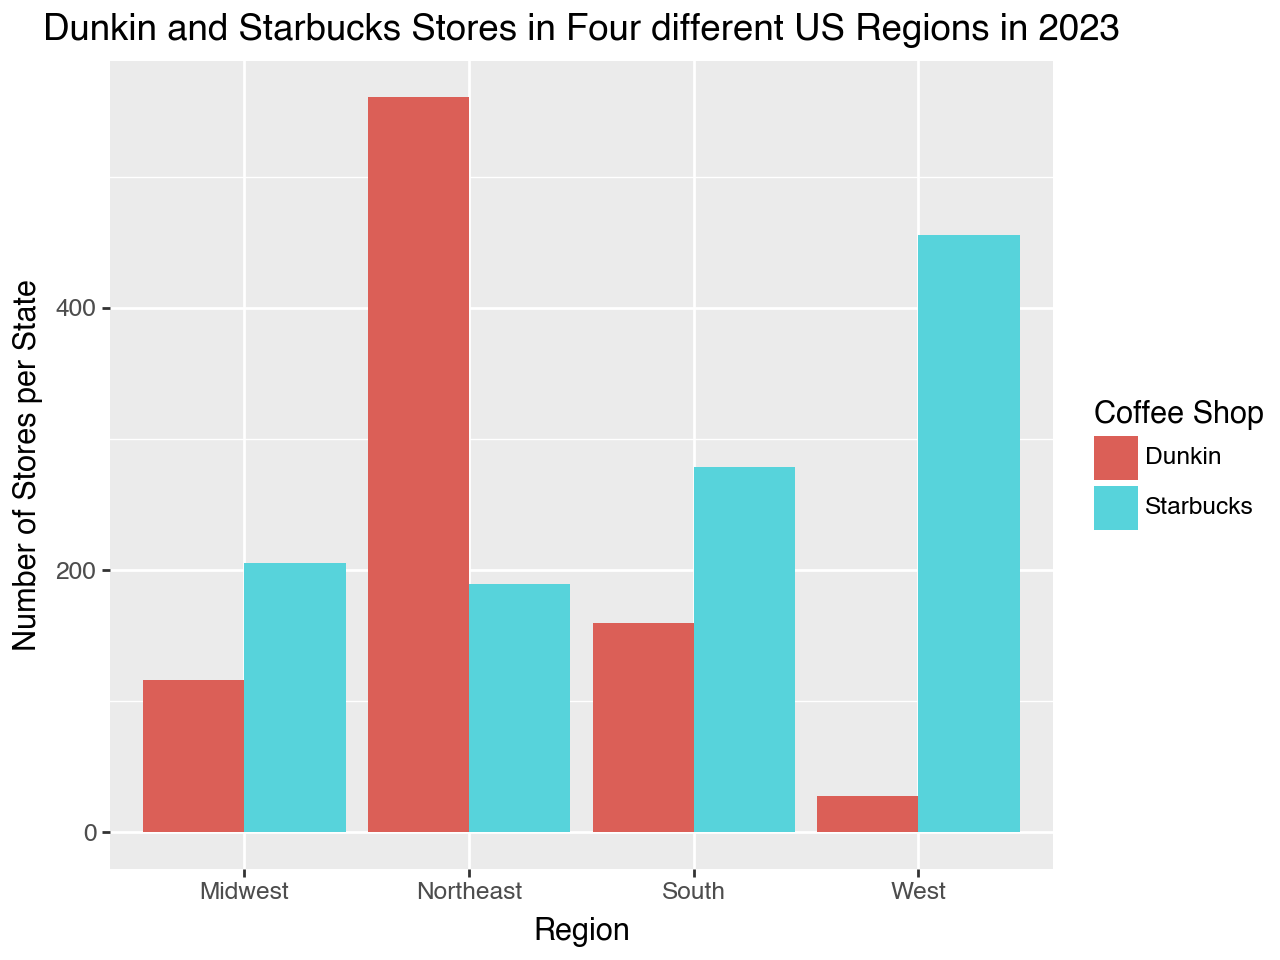

In [298]:
# Plot comparing number of Dunkin vs Starbucks in 2023 
import plotnine as pt

(pt.ggplot(coffee2new, pt.aes(x = "Region", y =  'Stores',fill='Coffee Shop'))
 + pt.geom_col(position = 'dodge')
 + pt.labs(title = "Dunkin and Starbucks Stores in Four different US Regions in 2023",
           x = 'Region',
           y = 'Number of Stores per State')
 )

In this bar graph, we can see that Dunkin and Starbucks have different popularity based on region. Dunkin is a more popular in the Northeast region, where their headquarters are located, and Starbucks dominates the rest of the US.

In [299]:
coffee3new = coffee2_long[(coffee2_long['Year']==2023) & (coffee2_long['Region']=="Northeast")]
coffee3new = coffee3new.groupby(['State','Coffee Shop']).agg({'Stores': 'mean'}).reset_index()
coffee3new

,State,Coffee Shop,Stores
0,Connecticut,Dunkin,480.0
1,Connecticut,Starbucks,123.0
2,District of Columbia,Dunkin,NaN
3,District of Columbia,Starbucks,91.0
4,Maine,Dunkin,159.0
5,Maine,Starbucks,30.0
6,Massachusetts,Dunkin,1068.0
7,Massachusetts,Starbucks,273.0
8,New Hampshire,Dunkin,218.0
9,New Hampshire,Starbucks,29.0


/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:344: PlotnineWarning: position_stack : Removed 1 rows containing missing values.


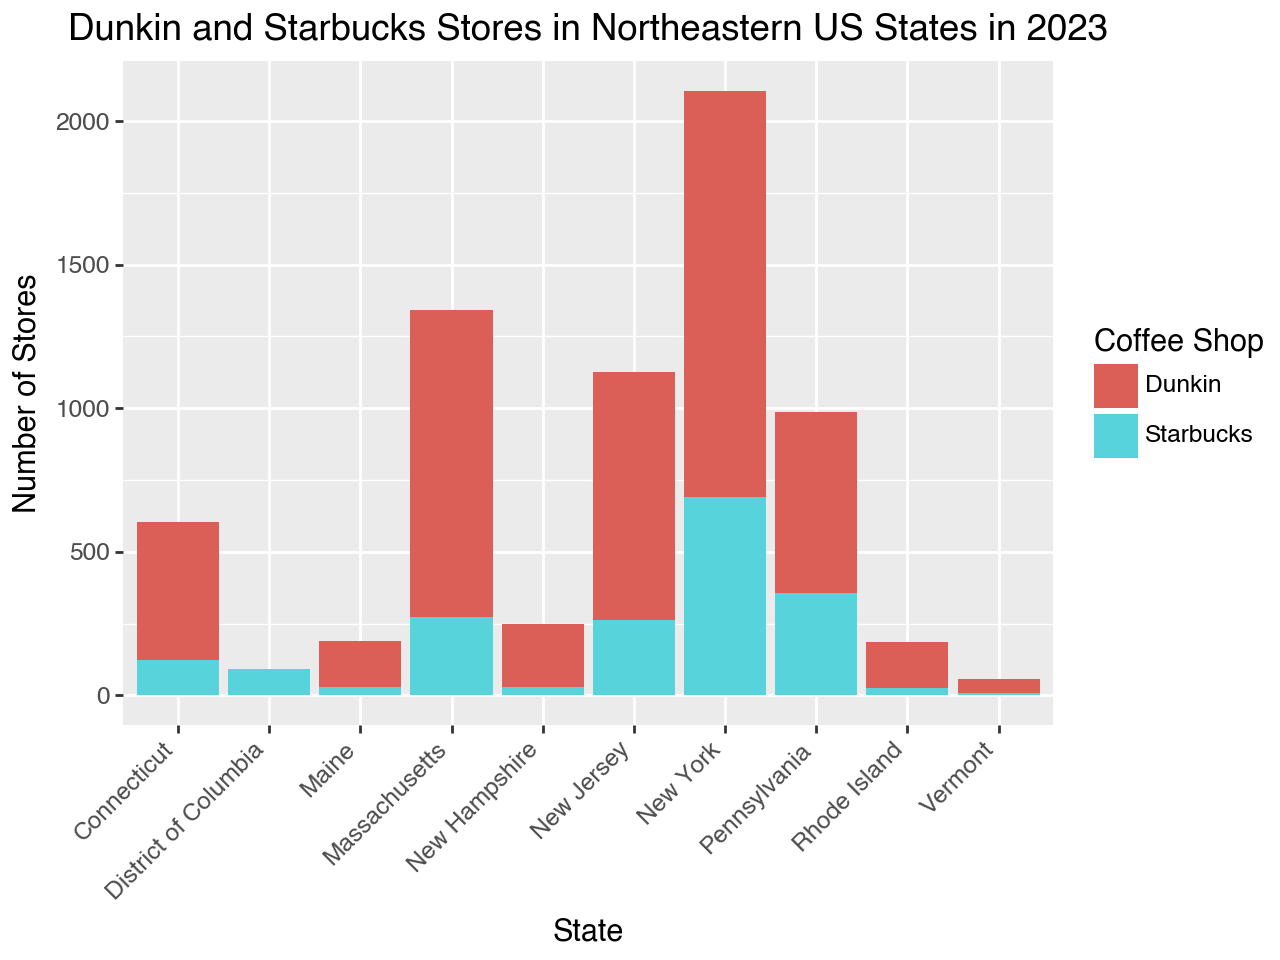

In [300]:
(pt.ggplot(coffee3new, pt.aes(x = "State", y =  'Stores',fill='Coffee Shop'))
 + pt.geom_col(stat = 'identity')
 + pt.labs(title = "Dunkin and Starbucks Stores in Northeastern US States in 2023",
           x = 'State',
           y = 'Number of Stores')
+ pt.theme(axis_text_x=pt.element_text(angle=45, hjust=1))
           )



Here, looking at the state breakdown of the Northeast region, we see a big difference between Dunkin and Starbucks stores in every state. This does not come as a surprise to me because the Northeast is known for Dunkin. Dunkin's headquarters are in Massachusetts, so it makes sense that Dunkin is more popular in Massachusetts and the surrounding states. In District of Columbia, there is not any data for Dunkin, so that is why this variable looks different from the others.

In [301]:
coffee4new = coffee2_long[coffee2_long['Year']==2023]
coffee4new = coffee4new.groupby(['Region','Coffee Shop']).agg({'Starbucks Stock Price': 'mean', 'Dunkin Stock Price':'mean','Stores':'mean'}).reset_index()
coffee4new

,Region,Coffee Shop,Starbucks Stock Price,Dunkin Stock Price,Stores
0,Midwest,Dunkin,96.4,106.48,116.500000
1,Midwest,Starbucks,96.4,106.48,205.666667
2,Northeast,Dunkin,96.4,106.48,560.333333
3,Northeast,Starbucks,96.4,106.48,189.100000
4,South,Dunkin,96.4,106.48,159.812500
5,South,Starbucks,96.4,106.48,278.875000
6,West,Dunkin,96.4,106.48,27.923077
7,West,Starbucks,96.4,106.48,455.615385


This shows the amount of stores of each coffee shop in 2023 and the current stock price of the coffee shop. Surprisingly, even though Starbucks has more locations throughout the country, the stock price is higher for Dunkin. This could mean the stock price for Dunkin could be inflated. Although this is not a causal relationship because there are numerous other factors contributing to stock price, number of stores is a big indicator that Starbucks may be undervalued.

In [302]:
coffee5new = coffee2_long[coffee2_long['Year']==2023]
coffee5new['Population'] = coffee5new['Population'].str.replace(',', '').astype(float)
coffee5new = coffee5new.groupby(['Region']).agg({'Population': 'sum', 'Stores':'sum'}).reset_index()
coffee5new

/var/folders/ss/ytdznf2d6mxcx8d7tp5l1qb40000gn/T/ipykernel_11484/1138351867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Region,Population,Stores
0,Midwest,137970908.0,3866.0
1,Northeast,116597386.0,6934.0
2,South,253153124.0,7019.0
3,West,157177144.0,6286.0


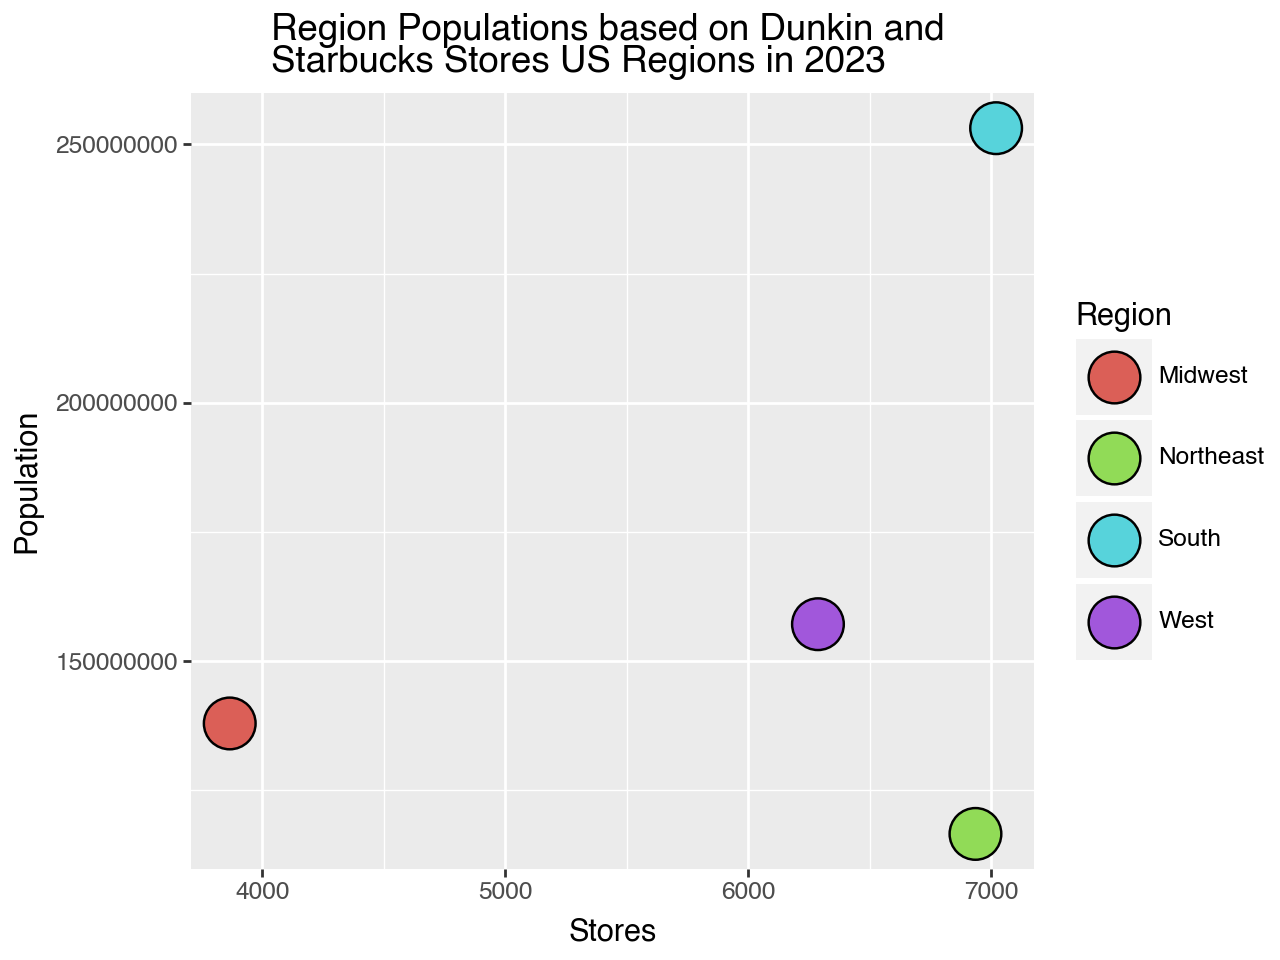

In [303]:
(pt.ggplot(coffee5new, pt.aes(x = "Stores", y = 'Population',fill='Region'))
 + pt.geom_point(size=10)
 + pt.labs(title = "Region Populations based on Dunkin and \nStarbucks Stores US Regions in 2023",
           x = 'Stores',
           y = 'Population')
           )

This shows that as the population of a region increases, the amount of stores generally trends upwards. This relationship is not very strong at all, and it seems like the Northeast region has way too many coffee shops compared to their population. However, if you've ever been to the Northeast, you know that they love their coffee, so they may make up for their lower population count by drinking a lot of coffee. Regardless, this is an interesting way to look at how the number of stores corresponds with population.

In [304]:
coffee6new = coffee2_long[coffee2_long['Year']==2023]
coffee6new['Population'] = coffee6new['Population'].str.replace(',', '').astype(float)
coffee6new = coffee6new.groupby(['State']).agg({'Population': 'sum', 'Stores':'sum'}).reset_index()
coffee6new = coffee6new.dropna().reset_index(drop=True)

/var/folders/ss/ytdznf2d6mxcx8d7tp5l1qb40000gn/T/ipykernel_11484/1024626096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


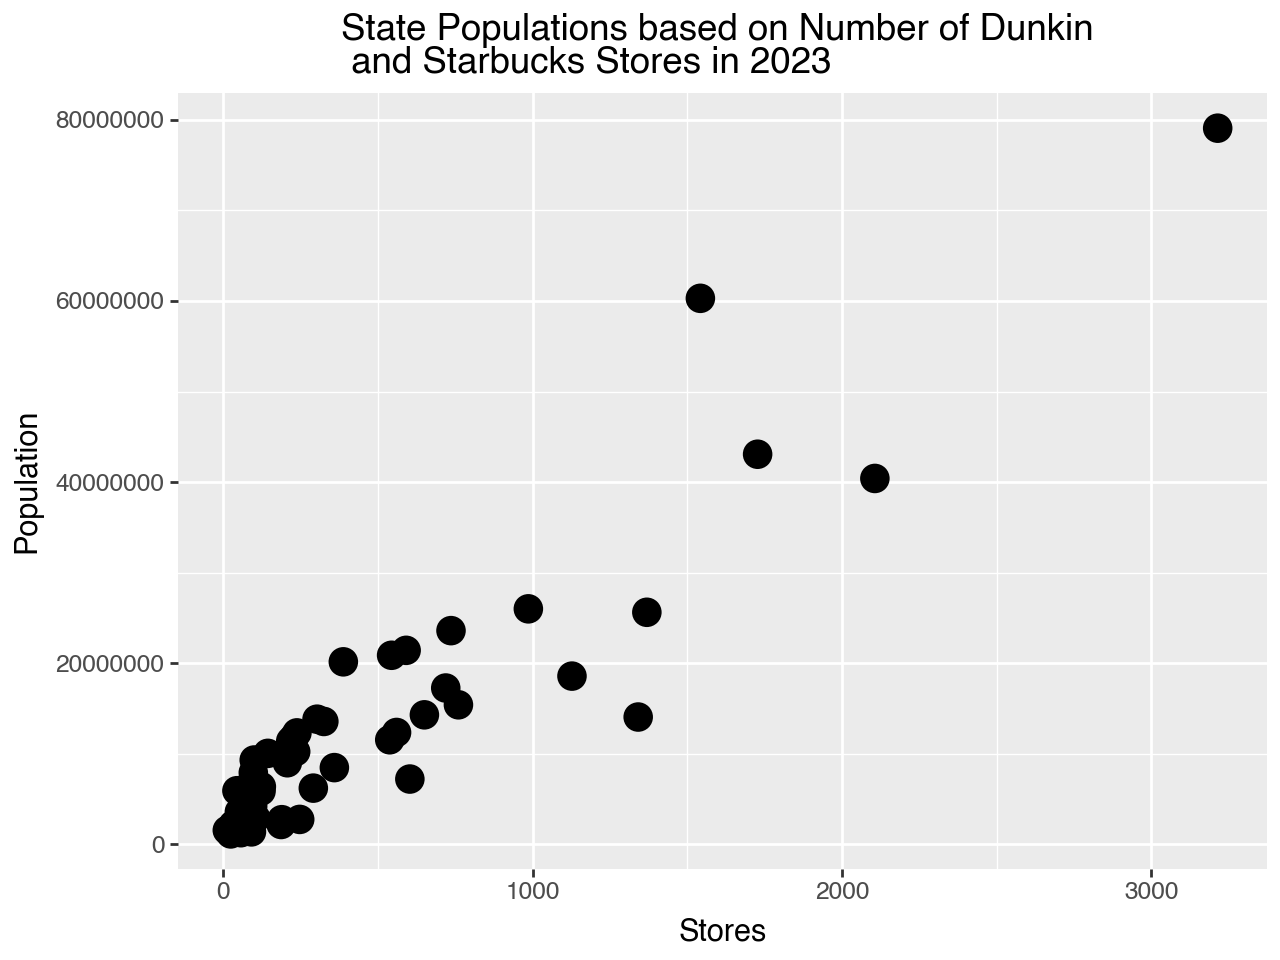

In [305]:
(pt.ggplot(coffee6new, pt.aes(x = "Stores", y = 'Population'))
 + pt.geom_point(size=5)
 + pt.labs(title = "State Populations based on Number of Dunkin \n and Starbucks Stores in 2023",
           x = 'Stores',
           y = 'Population')
           )

Here, we can see that for the most part, we have a linear relationship between number of stores and population. This makes sense because larger states will have more coffee drinkers, and we expect this relationship to be positively correlated.

## 8 Automation

In [308]:
import re

def webscrape(url):
    # Webscrapes from the website
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    table1 = soup.find_all('table',{'class','wpr-table'})[0]

    #Finds the amount of columns used and extracts the column headings as well as making empty lists for each column
    header_row = table1.find_all('tr')[0] 
    headers = [header.get_text(strip=True) for header in header_row.find_all('th')]
    data = {header: [] for header in headers}

    # Loops through each row to extract data and add it to the appropriate list. It will do this until it's out of index
    for stores in table.find_all('tr')[1:]:
        cells = stores.find_all(['th', 'td'])
        for i in range(len(headers)):
            if i < len(headers):
                data[headers[i]].append(cells[i].get_text(strip=True))
            else:
                data[headers[i]].append(None)
    
    newstructure = pd.DataFrame(data)
    return(newstructure)

webscrape("https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state")
webscrape("https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state")
webscrape("https://worldpopulationreview.com/state-rankings/walmart-stores-by-state").head()

,State,# of Stores
0,California,"3,080"
1,Texas,"1,346"
2,Florida,844
3,Washington,741
4,New York,692


Chat GPT-4o was used for this automation to help with making the function usable for tables with different numbers of columns. The function can also grab the name of the company from the existing header and will show up in the final table.